# Techniques of Artificial Intelligence
## Project - Sentiment Analysis on an imdb dataset
### Gaspard BERNARD 
### Adrien HANS

### Importing the wanted libraries : 

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import numpy as numpy
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy


#Plotting : 
import matplotlib.pyplot as plt

### Preprocessing : 
* #### Listing training and testing sets

In [2]:
reviews_train = []
for line in open('movie_data/full_train.txt', 'r', encoding="utf8"):
    
    reviews_train.append(line.strip())

*One of the review before cleaning it* :

In [3]:
print(reviews_train[3])

I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a dime a dozen, but this one stands out. <br /><br />This is one I'd recommend to anyone.


* #### Removing unwanted characters : 

In [4]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)

*Same review after cleaning it* : 

In [5]:
print(reviews_train_clean[3])

i saw this film in a sneak preview and it is delightful the cinematography is unusually creative the acting is good and the story is fabulous if this movie does not do well it wont be because it doesnt deserve to before this film i didnt realize how charming shia lebouf could be he does a marvelous self contained job as the lead theres something incredibly sweet about him and it makes the movie even better the other actors do a good job as well and the film contains moments of really high suspense more than one might expect from a movie about golf sports movies are a dime a dozen but this one stands out  this is one id recommend to anyone


* #### Vectorizing the training set :

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, binary=True)
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)

* #### Organizing the data :

In [8]:
target = [1 if i < 12500 else 0 for i in range(25000)]
# Definition of X_train et y_train : 
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size = 0.2
)

# Functions : 

In [9]:
def sigmoid(x):
    #return 1/(1 + numpy.exp(-x))
    
    #Expit is the logistic function : https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.expit.html
    return scipy.special.expit(x)

def sigmoid_derivative(x):
    return x * (1 - x)


def classif(x):
    return 1 * (x > 0.5)

def relu(x):
    return x * (x > 0)

def relu_derivative(x):
    return 1. * (x > 0)

## Neural Network : 

* ### Initialisation des paramètres : 

In [19]:
x=X_train
n1,n2=x.shape
binarizer_ = LabelBinarizer().fit(y_train)
y = binarizer_.transform(y_train)
yy = binarizer_.transform(y_test)

#Speed of descent : 
v=0.001

#Numbers of epochs and neurones in the hidden layer : 
N_Epoch_Max = 50
N_neurones_Max = 50

#Nbr min : 
N_Epoch_Min = 10
N_neurones_Min = 40

# Step : 
Step_Epoch = 10
Step_neurones = 10


* ### Entrainement et validation : 

In [ ]:
#For on the number of neurones : 

for nbr_neurones in range(N_neurones_Min, N_neurones_Max+Step_neurones, Step_neurones): 
    w1 = numpy.random.randn(n2,nbr_neurones)
    w2 = numpy.random.randn(nbr_neurones,1)
    dw1 = numpy.random.randn(n2,nbr_neurones)
    dw2 = numpy.random.randn(nbr_neurones,1)
    l2 = 0
    
    #Initializing the L_nbr_epochs :
    L_nbr_epochs=[]
    L_Error=[]
    
    for nbr_epochs in range(N_Epoch_Min, N_Epoch_Max+Step_Epoch, Step_Epoch): 
        
        for k in range(nbr_epochs):
            #feedforward pour les couches l1 et l2 (relu l1 et sigmoid l2)
            l1 = relu(x.dot(w1))
            l2 = sigmoid(l1.dot(w2))


            #backprop
            dw2 = l1.T.dot(2*(y - l2) * sigmoid_derivative(l2))
            dw1 = x.T.dot(numpy.dot(2*(y - l2) * sigmoid_derivative(l2), w2.T) * relu_derivative(l1))

            #vitesse de descente
            w1 += v*dw1
            w2 += v*dw2
            
        #validation of the model
        l1 = relu(X_test.dot(w1))
        l2 = sigmoid(l1.dot(w2))
        error = abs(yy-classif(l2))
        print("Error : ", numpy.mean(error), " nbr epochs : ", nbr_epochs, " nbr_neurones : ", nbr_neurones)
        
        #Plotting the results : 
        L_nbr_epochs.append(nbr_epochs)
        L_Error.append(numpy.mean(error))
    
    #Plot for each nbr_neurones : 
    plt.plot(L_nbr_epochs, L_Error)
    plt.xlabel("Number of epochs")
    plt.ylabel("Error")
    plt.title("Influence of the number of epochs for %ineurones in the hidden layer" %nbr_neurones)
    plt.show()

Error :  0.462  nbr epochs :  10  nbr_neurones :  40
Error :  0.3066  nbr epochs :  20  nbr_neurones :  40


## Tests on the influence on several layers : 

* In this part, we suppose that taking at least the optimized number of neurones in the hidden layer and the optimized number of epochs for only one layer will also give the best result possible for each number of hidden layers. Therefore, we take those variables below to start and we compare the influence of the number of layers and the speed of descent on the error : 

* ### Definition for the others layers :

In [44]:
x=X_train
n1,n2=x.shape
binarizer_ = LabelBinarizer().fit(y_train)
y = binarizer_.transform(y_train)
yy = binarizer_.transform(y_test)


#number of layers : 
N_Layers_Max = 4
N_Layers_Min = 0

#speed of the descent :
#v = 0.001

#Speed of the descent * 10 000
V_Min=1 #0.0001
V_Max=10 #0.001
Step_V=1 #0.0001

#nn neurones in the hidden layer, n2 features
nn = 50

#number of epoch :
N_Epoch =300

wi = numpy.random.randn(n2,nn)
wf = numpy.random.randn(nn,1)
dwi = numpy.random.randn(n2,nn)
dwf = numpy.random.randn(nn,1)

* ### Training : 

Error :  0.4182  Number of hidden layers :  0


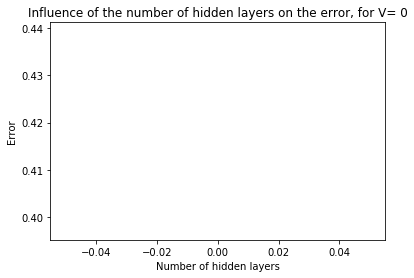

Error :  0.3924  Number of hidden layers :  1


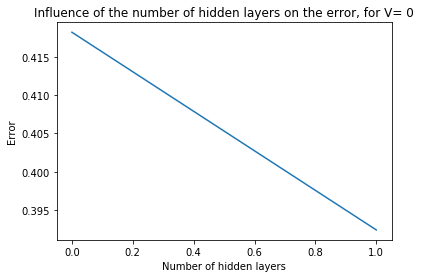

Error :  0.3902  Number of hidden layers :  0


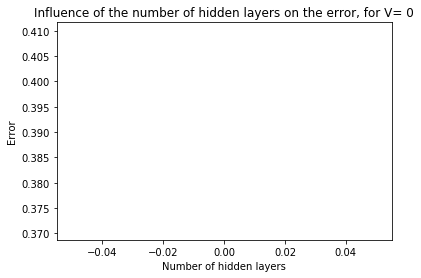

Error :  0.3642  Number of hidden layers :  1


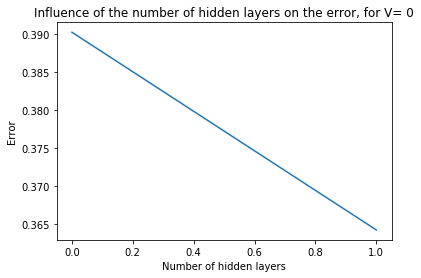

KeyboardInterrupt: 

In [45]:
#For on the speed of the descent : 
for v in range(V_Min, V_Max + Step_V, Step_V):
    v=v/10000

    L_Error_shl = []
    L_N_hl = []
        
    #For on the number of layers : 
    for number_layers in range(N_Layers_Min, N_Layers_Max + 1):

        #Initializing the varibles functions of the number of layers : 
        if (number_layers>2):
            dw = numpy.random.randn(number_layers-2,nn,nn)
            w = numpy.random.randn(number_layers-2,nn,nn)
            l = numpy.random.randn(number_layers-2,n1,nn)
            delta = numpy.random.randn(number_layers-2,n1,nn)



        #number of epochs
        for k in range(N_Epoch):

            li = sigmoid(x.dot(wi))

            if (number_layers>2):
                l[0] = sigmoid(li.dot(w[0]))
                for i in range(number_layers-4):

                    l[i+1]=sigmoid(l[i].dot(w[i+1]))

                lf = sigmoid(l[number_layers-3].dot(wf))
                deltaf = 2*(y - lf)
                dwf = l[number_layers-3].T.dot(2*(y - lf) * sigmoid_derivative(lf))
                delta[number_layers-3] = (deltaf * sigmoid_derivative(lf)).dot(wf.T)

                if(number_layers>3):

                    dw[number_layers-3] = l[number_layers-4].T.dot(delta[number_layers-3]*sigmoid_derivative(l[number_layers-3]))

                    for i in range(number_layers-4):

                        delta[number_layers-i-4] = (delta[number_layers-i-3] * sigmoid_derivative(l[number_layers-i-3])).dot(w[number_layers-i-3].T)
                        dw[number_layers-i-4] = l[number_layers-i-5].T.dot(delta[number_layers-i-4]* sigmoid_derivative(l[number_layers-i-4]))
                        w[number_layers-i-4] += v*dw[number_layers-i-4]

                    delta[0] = (delta[1] * sigmoid_derivative(l[1])).dot(w[1].T)

                dw[0] = li.T.dot(delta[0]* sigmoid_derivative(l[0]))
                dwi = x.T.dot((delta[0] * sigmoid_derivative(l[0])).dot(w[0].T)*sigmoid_derivative(li))
                w[number_layers-3] += v*dw[number_layers-3]
                w[0] += v*dw[0]
            else:
                lf = sigmoid(li.dot(wf))
                dwf = li.T.dot(2*(y - lf) * sigmoid_derivative(lf))
                dwi = x.T.dot(numpy.dot(2*(y - lf) * sigmoid_derivative(lf), wf.T) * sigmoid_derivative(li))

            wi += v*dwi
            wf += v*dwf

        #validation du modèle
        if(number_layers>2):
            l = numpy.random.randn(number_layers-2,5000,nn)
            li = sigmoid(X_test.dot(wi))
            l[0] = sigmoid(li.dot(w[0]))
            for i in range(number_layers-4):
                l[i+1]=sigmoid(l[i].dot(w[i+1]))

            lf = sigmoid(l[number_layers-3].dot(wf))

        else:
            li = sigmoid(X_test.dot(wi))
            lf = sigmoid(li.dot(wf))

        error = abs(yy-classif(lf))
        print("Error : ", numpy.mean(error), " Number of hidden layers : ", number_layers, " V = ", v)

        L_N_hl.append(number_layers)
        L_Error_shl.append(numpy.mean(error))

    #Plotting the influence of the number of hidden layers on the Error, for each speed :  
    plt.plot(L_N_hl, L_Error_shl)
    plt.xlabel("Number of hidden layers")
    plt.ylabel("Error")
    plt.title("Influence of the number of hidden layers on the error, for V= %i" %v)
    plt.show()




# Demonstration : 

* ### Reading the demo test : 

In [16]:
reviews_demo_test = []
for line in open('movie_data/demo_test.txt', 'r', encoding="utf8"):
    reviews_demo_test.append(line.strip())

* ### Printing the demo_test reviews : 

In [17]:
print(reviews_demo_test)

['\ufeffThe movie is bad', 'The movie is good']


* ### Removing unwanted characters : 

In [18]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_demo_test_clean = preprocess_reviews(reviews_demo_test)

* ### Printing the demo_test reviews after cleaning : 

In [19]:
print(reviews_demo_test_clean[0])

﻿the movie is bad


* ### Vectorizing the demo_test : 

In [20]:
X_demo_test = cv.transform(reviews_demo_test_clean)

* ### Function to assert if a review is positive or negative

In [21]:
def NegPos(x):
    x=classif(x)
    if x==0 :
        return 'Negative review'
    else : 
        return 'Positive review'

* ### Training : 

Parameters : 

In [22]:
final_nbr_neurones = 100
final_nbr_epochs = 200

In [23]:
x=X_train
n1,n2=x.shape
binarizer_ = LabelBinarizer().fit(y_train)
y = binarizer_.transform(y_train)

#100 neurones dans la couche cachée, n2 features
w1 = numpy.random.randn(n2,final_nbr_neurones)
w2 = numpy.random.randn(final_nbr_neurones,1)
dw1 = numpy.random.randn(n2,final_nbr_neurones)
dw2 = numpy.random.randn(final_nbr_neurones,1)
l2 = 0

#nombre epochs
for k in range(final_nbr_epochs):

            #feedforward pour les couches l1 et l2 (relu l1 et sigmoid l2)
            l1 = relu(x.dot(w1))
            l2 = sigmoid(l1.dot(w2))


            #backprop
            dw2 = l1.T.dot(2*(y - l2) * sigmoid_derivative(l2))
            dw1 = x.T.dot(numpy.dot(2*(y - l2) * sigmoid_derivative(l2), w2.T) * relu_derivative(l1))

            #vitesse de descente
            w1 += 0.005*dw1
            w2 += 0.005*dw2

* ### Prediction

In [24]:
l1 = relu(X_demo_test.dot(w1))
l2 = sigmoid(l1.dot(w2))

for i in range (len(reviews_demo_test_clean)):
    print ('the review number', i+1, 'is a', NegPos(l2[i]))

the review number 1 is a Negative review
the review number 2 is a Positive review
